#
Brain Tumor Auto-Segmentation for Magnetic Resonance Imaging (MRI)
Jose R F Junior
Data Scientist - web2aajax@gmail.com

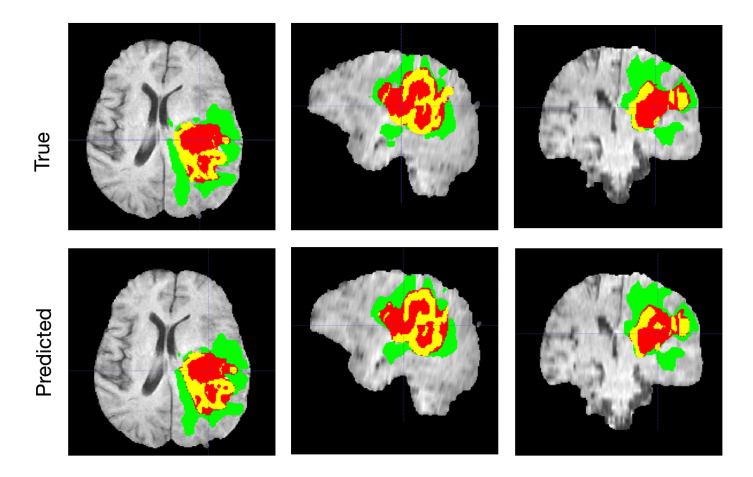![alt text](https://)

# Outline

Click on these links to jump to that section of the notebook!
- [Explore the data](#data)
- [Get a subsection](#subsection)
- [U-net model](#unet)

<a name="data"></a>
# Explore the data


In [ ]:
import numpy as np
import nibabel as nib

#### Image of brain

In [ ]:
image_path = "./BraTS-Data/imagesTr/BRATS_001.nii.gz"
image_obj = nib.load(image_path)
type(image_obj)

In [ ]:
image_data = image_obj.get_fdata()
type(image_data)

In [ ]:
print("height, width, depth, channels")
image_data.shape

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# start at this depth to see more of the middle of the brain
i=65

In [ ]:
# run this cell a few times
# to see some slices of the brain
print(f"depth {i}")
plt.imshow(image_data[:,:,i,0]);
i +=1 

#### Label of diseases

In [ ]:
label_path = "./BraTS-Data/labelsTr/BRATS_003.nii.gz"
#label = np.array(nib.load(label_nifty_file).get_fdata())
label_obj = nib.load(label_path)
type(label_obj)

In [ ]:
label = label_obj.get_fdata()
type(label)

In [ ]:
print("height, width, depth")
label.shape

In [ ]:
# See that all label values are either 0, 1, 2 or 3
print("""categories: 
0: normal 
1: edema
2: non-enhancing tumor 
3: enhancing tumor""")
np.unique(label)

#### Label for edema

In [ ]:
label_edema = (label == 1.)

In [ ]:
# start at this index to see more of the middle of the brain image
i=65

In [ ]:
# run this cell a few times
# to see the edema labels at various slices
print(f"depth {i}")
plt.imshow(label_edema[:,:,i])
i +=1

### This is the end of this practice section.

Please continue on with the lecture videos!

---

<a name="subsection"></a>
# Get a sub-section

Show how to do this for 1D arrays. the assignment will be 3D.

In [ ]:
import numpy as np

In [ ]:
image = np.array([10,11,12,13,14,15])
image

In [ ]:
image_length = image.shape[0]
image_length

In [ ]:
patch_length = 3

In [ ]:
start_i = 0

In [ ]:
# run this a few times to see some valid sub-sections
# and see when it's no longer valid
print(f"start index {start_i}")
end_i = start_i + patch_length
print(f"end index {end_i}")
sub_section = image[start_i: end_i]
print(sub_section)
start_i +=1

In [ ]:
# This is a valid patch
start_i = 3
print(f"start index {start_i}")
end_i = start_i + patch_length
print(f"end index {end_i}")
sub_section = image[start_i: end_i]
print(sub_section)

In [ ]:
print(f"The largest start index for which "
      f"a sub section is still valid is "
      f"{image_length - patch_length}")

In [ ]:
print(f"The range of valid start indices is:")
valid_start_i = [i for i in range(image_length - patch_length + 1)]
print(valid_start_i)

Randomly select a valid integer for the start index

In [ ]:
start_i = np.random.randint(image_length - patch_length + 1)
print(f"randomly selected start index {start_i}")

In [ ]:
for _ in range(10):
    start_i = np.random.randint(image_length - patch_length + 1)
    print(f"randomly selected start index {start_i}")

### This is the end of this practice section.

Please continue on with the lecture videos!

---

<a name="unet"></a>
## U-Net model


In [ ]:
import keras
from keras import backend as K
from keras.engine import Input, Model
from keras.layers import Conv3D, MaxPooling3D, UpSampling3D, Activation, BatchNormalization, PReLU, Deconvolution3D
from keras.optimizers import Adam
from keras.layers.merge import concatenate
K.set_image_data_format("channels_first")

Using TensorFlow backend.


### Choose depth
We'll choose to make a smaller U-Net which has a full depth of 2.

In [ ]:
u_net_depth = 2

#### Input layer

The shape of the input is (num_channels, height, width, depth).

For the assignment, the values will be:
- num_channels: 4
- height: 160
- width: 160
- depth: 16

In [ ]:
input_layer = Input(shape=(4, 160, 160, 16))
input_layer

<tf.Tensor 'input_1:0' shape=(?, 4, 160, 160, 16) dtype=float32>

Notice that the tensor shape has a '?' as the very first dimension.  This is the batch size.
(batch_size, num_channels, height, width, depth)

## Contracting path (downward)
We'll start with the downward path on the left side of the U-Net.  The (height,width,depth) of the 'image' gets smaller, and the number of channels increases.

### Depth 0

When we say 'depth' here, we're referring to the depth of the U-net and not the depth related to the height, width, depth of an image.

The number of filters is specified for each depth and for each layer within that depth.
At depth 0, for layer 0, we'll use 32 filters.

The formula we're using is:
$$filters_{i} = 32 \times (2^{i})$$

Where $i$ is the current depth.

So at depth $i=0$:
$$filters_{0} = 32 \times (2^{0}) = 32$$

#### Layer 0
There are two convolutional layers for each depth

##### 3d convolution

In [ ]:
down_depth_0_layer_0 = Conv3D(filters=32, 
                              kernel_size=(3,3,3),
                              padding='same',
                              strides=(1,1,1)
                              )(input_layer)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


You can ignore the warning messages.

In [ ]:
down_depth_0_layer_0

<tf.Tensor 'conv3d_1/add:0' shape=(?, 32, 160, 160, 16) dtype=float32>

##### Add a relu activation

In [ ]:
down_depth_0_layer_0 = Activation('relu')(down_depth_0_layer_0)
down_depth_0_layer_0

<tf.Tensor 'activation_1/Relu:0' shape=(?, 32, 160, 160, 16) dtype=float32>

### Depth 0
#### Layer 1
For layer 1 of depth 0, we'll choose 64 filters.  

The formula we're using is:
$$filters_{i} = 32 \times (2^{i}) \times 2$$

Where $i$ is the current depth. 
- Notice the '$\times 2$' at the end of this expression, which isn't there for layer 0.


So at depth $i=0$:
$$filters_{0} = 32 \times (2^{0}) \times 2 = 64$$


In [ ]:
down_depth_0_layer_1 = Conv3D(filters=64, 
                kernel_size=(3,3,3),
                padding='same',
                strides=(1,1,1)
               )(down_depth_0_layer_0)
down_depth_0_layer_1 = Activation('relu')(down_depth_0_layer_1)
down_depth_0_layer_1

<tf.Tensor 'activation_2/Relu:0' shape=(?, 64, 160, 160, 16) dtype=float32>

#### Max pooling
There is max pooling for the earlier depths (when the inputs to the layers are larger).

- To decide if we include max pooling, check if the current depth of 0 is less than the U-Net's full depth of 2 minus 1.
- The current layer depth of 0 is less than 2 minus 1.
- In other words, 0 < 1.
- So we'll include a max pooling layer.

In [ ]:
down_depth_0_layer_pool = MaxPooling3D(pool_size=(2,2,2))(down_depth_0_layer_1)
down_depth_0_layer_pool

<tf.Tensor 'max_pooling3d_1/transpose_1:0' shape=(?, 64, 80, 80, 8) dtype=float32>

### Depth 1

At depth 1, layer 0, we'll choose 64 filters

The formula we're using is:
$$filters_{i} = 32 \times (2^{i})$$

Where $i$ is the current depth.

So at depth $i=1$:
$$filters_{1} = 32 \times (2^{1}) = 64$$

#### layer 0

In [ ]:
down_depth_1_layer_0 = Conv3D(filters=64, 
                kernel_size=(3,3,3),
                padding='same',
                strides=(1,1,1)
               )(down_depth_0_layer_pool)
down_depth_1_layer_0 = Activation('relu')(down_depth_1_layer_0)
down_depth_1_layer_0

<tf.Tensor 'activation_3/Relu:0' shape=(?, 64, 80, 80, 8) dtype=float32>

#### Layer 1

For layer 1 of depth 1, we'll choose 128 filters.  

The formula we're using is:
$$filters_{i} = 32 \times (2^{i}) \times 2$$

Where $i$ is the current depth. 
- Notice the '$\times 2$' at the end of this expression, which isn't there for layer 0.


So at depth $i=1$:
$$filters_{0} = 32 \times (2^{1}) \times 2 = 128$$


In [ ]:
down_depth_1_layer_1 = Conv3D(filters=128, 
                kernel_size=(3,3,3),
                padding='same',
                strides=(1,1,1)
               )(down_depth_1_layer_0)
down_depth_1_layer_1 = Activation('relu')(down_depth_1_layer_1)
down_depth_1_layer_1

<tf.Tensor 'activation_4/Relu:0' shape=(?, 128, 80, 80, 8) dtype=float32>

##### No max pooling at depth 1

When we get to the "bottom" of the U-net, a the last depth, we don't need to apply max pooling.

- To decide if we include max pooling, check if the current depth of 1 is less than the U-Net's full depth of 2 minus 1.
- The current layer depth of 1 is not less than 2 minus 1.
- In other words, 1 is not less than 1.
- So we won't include a max pooling layer.

## Expanding Path (upward)

Now we'll work on the expanding path of the U-Net, (going up on the right side, when viewing the diagram).  The image's (height,width,depth) gets larger in the expanding path.

### Depth 0
#### Up sampling layer 0

We'll use a pool size of (2,2,2) for up sampling.
- This is the default value for [tf.keras.layers.UpSampling3D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling3D)
- We'll still set this parameter  explicitly for learning purposes.
- As input to the up sampling at depth 1, we'll use the last layer of the down sampling.  In this case, it's the depth 1 layer 1.
- Note that we're not adding any activation to this upsampling layer.

In [ ]:
up_depth_0_layer_0 = UpSampling3D(size=(2,2,2))(down_depth_1_layer_1)
up_depth_0_layer_0

<tf.Tensor 'up_sampling3d_1/concat_2:0' shape=(?, 128, 160, 160, 16) dtype=float32>

#### Concatenate the up sampled layer with the down sampled layer

Use the layers that are both at the same depth of 0.
- up_depth_0_layer_0: shape is ?, 128, 160, 160, 16
- depth_0_layer_1: shape is (?, 64, 160, 160, 16)

- Double check that both of these layers have the same shape.
- If they're the same shape, then they can be concatenated at axis 1 (the channel axis).
- The height, width, depth (depth of image, not of network) is 160, 160, 16 for both.

In [ ]:
print(up_depth_0_layer_0)
print()
print(down_depth_0_layer_1)

Tensor("up_sampling3d_1/concat_2:0", shape=(?, 128, 160, 160, 16), dtype=float32)

Tensor("activation_2/Relu:0", shape=(?, 64, 160, 160, 16), dtype=float32)


In [ ]:
up_depth_1_concat = concatenate([up_depth_0_layer_0,
                                 down_depth_0_layer_1],
                                axis=1)
up_depth_1_concat

<tf.Tensor 'concatenate_1/concat:0' shape=(?, 192, 160, 160, 16) dtype=float32>

The up sampling layer has 128 channels, and the down convolution layer has 64 channels.
- When concatenated, they have 128 + 64 = 192 channels.

#### up convolution layer 1

The number of filters for this layer will be set to the number of channels in the down convolution's layer 1 at the same depth of 0 (down_depth_0_layer_1).

- The shape of down_depth_0_layer_1 is (?, 64, 160, 160, 16)

In [ ]:
down_depth_0_layer_1

<tf.Tensor 'activation_2/Relu:0' shape=(?, 64, 160, 160, 16) dtype=float32>

- The number of channels for depth_0_layer_1 is 64

In [ ]:
print(f"number of filters: {down_depth_0_layer_1._keras_shape[1]}")

number of filters: 64


In [ ]:
up_depth_1_layer_1 = Conv3D(filters=64, 
                            kernel_size=(3,3,3),
                            padding='same',
                            strides=(1,1,1)
                           )(up_depth_1_concat)
up_depth_1_layer_1 = Activation('relu')(up_depth_1_layer_1)
up_depth_1_layer_1

<tf.Tensor 'activation_5/Relu:0' shape=(?, 64, 160, 160, 16) dtype=float32>

#### up convolution layer 2

The number of filters will also be set to 64.
- Again, since we're at depth 0, we look for the number of channels in the downward convolution layer at depth 0.
- The shape of down_depth_0_layer_1 is (?, 4, 160, 160, 64)

In [ ]:
down_depth_0_layer_1

<tf.Tensor 'activation_2/Relu:0' shape=(?, 64, 160, 160, 16) dtype=float32>

- The number of channels in down_depth_0_layer_1 is 64.

In [ ]:
print(f"number of filters: {down_depth_0_layer_1._keras_shape[1]}")

number of filters: 64


In [ ]:
up_depth_1_layer_2 = Conv3D(filters=64, 
                            kernel_size=(3,3,3),
                            padding='same',
                            strides=(1,1,1)
                           )(up_depth_1_layer_1)
up_depth_1_layer_2 = Activation('relu')(up_depth_1_layer_2)
up_depth_1_layer_2

<tf.Tensor 'activation_6/Relu:0' shape=(?, 64, 160, 160, 16) dtype=float32>

### Final Convolution

The number of filters is set to the number of labels.
- The number of labels is the number of categories.

In this case, there are 3 labels

- 1: edema
- 2: non-enhancing tumor 
- 3: enhancing tumor

In [ ]:
final_conv = Conv3D(filters=3, #3 categories 
                    kernel_size=(1,1,1),
                    padding='valid',
                    strides=(1,1,1)
                    )(up_depth_1_layer_2)
final_conv

<tf.Tensor 'conv3d_9/add:0' shape=(?, 3, 160, 160, 16) dtype=float32>

#### Activation for final convolution

In [ ]:
final_activation = Activation('sigmoid')(final_conv)
final_activation

<tf.Tensor 'activation_7/Sigmoid:0' shape=(?, 3, 160, 160, 16) dtype=float32>

### Create and compile the model

In this example, we're setting the loss and metrics to options that are pre-built in Keras.  However, in the assignment, you will implement better loss funtions and metrics for evaluating the model's performance.
- The soft dice loss
- dice coefficient.

In [ ]:
model = Model(inputs=input_layer, outputs=final_activation)
model.compile(optimizer=Adam(lr=0.00001),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy']
             )

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 4, 160, 160,  0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 32, 160, 160, 3488        input_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 160, 160, 0           conv3d_1[0][0]                   
__________________________________________________________________________________________________
conv3d_2 (Conv3D)               (None, 64, 160, 160, 55360       activation_1[0][0]               
____________________________________________________________________________________________

### Double check your model

Use a function that we've provided to create the same model, and check that the layers and the layer dimensions match!

In [ ]:
import util

In [ ]:
model_2 = util.unet_model_3d(depth=2,
                                loss_function='categorical_crossentropy',
                                metrics=['categorical_accuracy'])

In [ ]:
model_2.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 4, 160, 160,  0                                            
__________________________________________________________________________________________________
conv3d_17 (Conv3D)              (None, 32, 160, 160, 3488        input_3[0][0]                    
__________________________________________________________________________________________________
activation_15 (Activation)      (None, 32, 160, 160, 0           conv3d_17[0][0]                  
__________________________________________________________________________________________________
conv3d_18 (Conv3D)              (None, 64, 160, 160, 55360       activation_15[0][0]              
____________________________________________________________________________________________